In [38]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

In [9]:
# Definir el ticker, la fecha de inicio y la fecha de fin
ticker = 'TSLA'
start_date = '2010-06-29'
end_date = '2024-05-23'

df = yf.download(ticker, start=start_date, end=end_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-05-16,174.100006,175.789993,171.429993,174.839996,174.839996,59812200
2024-05-17,173.550003,179.630005,172.750000,177.460007,177.460007,77445800
2024-05-20,177.559998,177.750000,173.520004,174.949997,174.949997,61727400


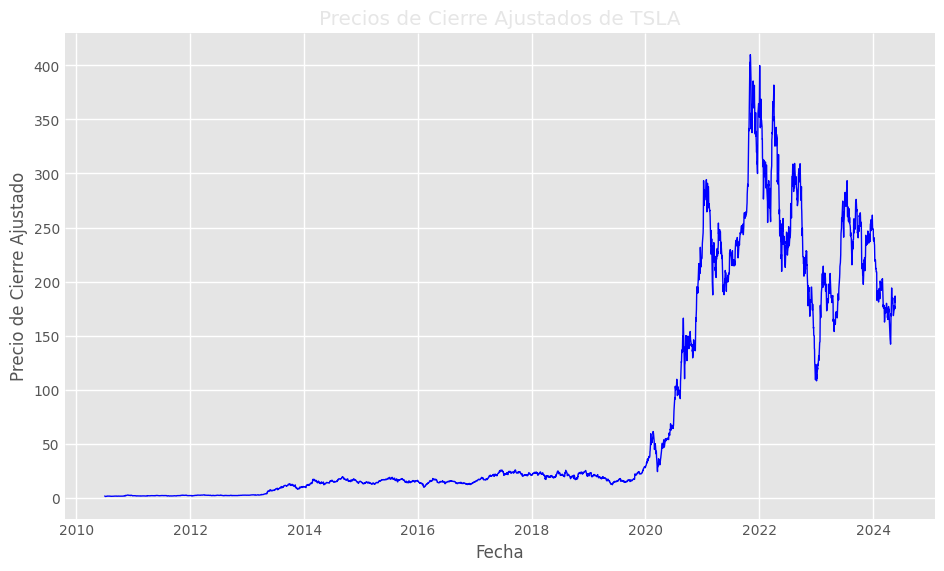

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Adj Close'], color='blue', linewidth=1)
plt.title('Precios de Cierre Ajustados de TSLA')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado')
plt.grid(True)
plt.show()

In [37]:
# Seleccionar la columna de precios de cierre ajustados
ts = df['Adj Close']

# Convertir la columna en una serie de tiempo
time_series = pd.Series(ts)

# Mostrar la serie de tiempo
print(time_series)

Date
2010-06-29      1.592667
2010-06-30      1.588667
2010-07-01      1.464000
2010-07-02      1.280000
2010-07-06      1.074000
                 ...    
2024-05-16    174.839996
2024-05-17    177.460007
2024-05-20    174.949997
2024-05-21    186.600006
2024-05-22    180.110001
Name: Adj Close, Length: 3499, dtype: float64


In [39]:
result = adfuller(time_series)

# Imprimir los resultados
print('Estadística ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:', result[4])

Estadística ADF: -1.2948988222260018
Valor p: 0.6315028651738864
Valores críticos: {'1%': -3.4322364645313335, '5%': -2.862373532387402, '10%': -2.567213704163575}


In [43]:
result_diff = adfuller(differenced_series)

# Imprimir los resultados
print('Estadística ADF (serie diferenciada):', result_diff[0])
print('Valor p (serie diferenciada):', result_diff[1])
print('Valores críticos (serie diferenciada):', result_diff[4])


Estadística ADF (serie diferenciada): -18.27993274732731
Valor p (serie diferenciada): 2.3095486496751703e-30
Valores críticos (serie diferenciada): {'1%': -3.432237553578943, '5%': -2.8623740134294255, '10%': -2.5672139602568667}
